In [1]:
# Import Packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import pickle
import os


In [2]:
# Import Data Frame 
data = pd.read_csv('DATASET/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [3]:
# Print the Data Frame columns
data.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [4]:
# Renaming german into to english 
data = data.rename(columns = {
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value',
    'VORJAHRESWERT': 'Previous Year',
    'VERAEND_VORMONAT_PROZENT':'Event_Prior_Month_Percent',
    'VERAEND_VORJAHRESMONAT_PROZENT':'Event_Previous Month_Percentage',
    'ZWOELF_MONATE_MITTELWERT':'Tweleve_Months_Average'
})

data['Category'].replace(['Alkoholunfälle', 'Fluchtunfälle','Verkehrsunfälle'],['alcohol accidents','escape accidents','traffic accidents'], inplace=True)
data['Accident_Type'].replace(['insgesamt' ,'Verletzte und Getötete', 'mit Personenschäden'],['all in all','injured and killed','with personal injury'], inplace=True)


In [5]:
data

,Category,Accident_Type,Year,Month,Value,Previous Year,Event_Prior_Month_Percent,Event_Previous Month_Percentage,Tweleve_Months_Average
0,alcohol accidents,all in all,2022,202201,NaN,16.0,NaN,NaN,NaN
1,alcohol accidents,all in all,2022,202202,NaN,14.0,NaN,NaN,NaN
2,alcohol accidents,all in all,2022,202203,NaN,24.0,NaN,NaN,NaN
3,alcohol accidents,all in all,2022,202204,NaN,16.0,NaN,NaN,NaN
4,alcohol accidents,all in all,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,traffic accidents,injured and killed,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,traffic accidents,injured and killed,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,traffic accidents,injured and killed,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [6]:
data.columns

Index(['Category', 'Accident_Type', 'Year', 'Month', 'Value', 'Previous Year',
       'Event_Prior_Month_Percent', 'Event_Previous Month_Percentage',
       'Tweleve_Months_Average'],
      dtype='object')

In [7]:
# Selecting columns 
imp = ['Category', 'Accident_Type', 'Year', 'Month', 'Value']

In [8]:
print(data['Category'].unique())

['alcohol accidents' 'escape accidents' 'traffic accidents']


In [9]:
print(data['Accident_Type'].unique())

['all in all' 'injured and killed' 'with personal injury']


In [10]:
print(data['Year'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009
 2008 2007 2006 2005 2004 2003 2002 2001 2000]


In [11]:
print(data['Month'].unique())

['202201' '202202' '202203' '202204' '202205' '202206' '202207' '202208'
 '202209' '202210' '202211' '202212' 'Summe' '202101' '202102' '202103'
 '202104' '202105' '202106' '202107' '202108' '202109' '202110' '202111'
 '202112' '202001' '202002' '202003' '202004' '202005' '202006' '202007'
 '202008' '202009' '202010' '202011' '202012' '201901' '201902' '201903'
 '201904' '201905' '201906' '201907' '201908' '201909' '201910' '201911'
 '201912' '201801' '201802' '201803' '201804' '201805' '201806' '201807'
 '201808' '201809' '201810' '201811' '201812' '201701' '201702' '201703'
 '201704' '201705' '201706' '201707' '201708' '201709' '201710' '201711'
 '201712' '201601' '201602' '201603' '201604' '201605' '201606' '201607'
 '201608' '201609' '201610' '201611' '201612' '201501' '201502' '201503'
 '201504' '201505' '201506' '201507' '201508' '201509' '201510' '201511'
 '201512' '201401' '201402' '201403' '201404' '201405' '201406' '201407'
 '201408' '201409' '201410' '201411' '201412' '20130

In [12]:
# Remove the 'Summe' from Month column 
data = data[data['Month'] != 'Summe']

In [13]:
print(data['Month'].unique())

['202201' '202202' '202203' '202204' '202205' '202206' '202207' '202208'
 '202209' '202210' '202211' '202212' '202101' '202102' '202103' '202104'
 '202105' '202106' '202107' '202108' '202109' '202110' '202111' '202112'
 '202001' '202002' '202003' '202004' '202005' '202006' '202007' '202008'
 '202009' '202010' '202011' '202012' '201901' '201902' '201903' '201904'
 '201905' '201906' '201907' '201908' '201909' '201910' '201911' '201912'
 '201801' '201802' '201803' '201804' '201805' '201806' '201807' '201808'
 '201809' '201810' '201811' '201812' '201701' '201702' '201703' '201704'
 '201705' '201706' '201707' '201708' '201709' '201710' '201711' '201712'
 '201601' '201602' '201603' '201604' '201605' '201606' '201607' '201608'
 '201609' '201610' '201611' '201612' '201501' '201502' '201503' '201504'
 '201505' '201506' '201507' '201508' '201509' '201510' '201511' '201512'
 '201401' '201402' '201403' '201404' '201405' '201406' '201407' '201408'
 '201409' '201410' '201411' '201412' '201301' '2013

In [14]:
print(data['Value'].unique())

[      nan 1.600e+01 1.400e+01 2.400e+01 4.800e+01 4.400e+01 4.600e+01
 5.400e+01 4.300e+01 3.300e+01 2.100e+01 2.800e+01 4.000e+01 2.700e+01
 2.600e+01 4.900e+01 5.800e+01 3.400e+01 2.300e+01 1.300e+01 2.200e+01
 3.600e+01 3.900e+01 3.100e+01 4.700e+01 4.500e+01 2.900e+01 3.500e+01
 3.200e+01 2.500e+01 5.100e+01 1.900e+01 4.100e+01 5.200e+01 3.000e+01
 4.200e+01 1.000e+01 2.000e+01 5.000e+01 1.700e+01 3.700e+01 1.500e+01
 1.800e+01 5.600e+01 5.500e+01 5.700e+01 3.800e+01 6.300e+01 6.500e+01
 5.300e+01 6.400e+01 7.600e+01 6.700e+01 7.900e+01 6.800e+01 8.200e+01
 6.600e+01 7.400e+01 6.100e+01 8.400e+01 7.100e+01 1.070e+02 8.300e+01
 8.500e+01 6.000e+01 7.700e+01 7.800e+01 7.300e+01 9.600e+01 9.900e+01
 5.000e+00 9.000e+00 6.000e+00 7.000e+00 1.100e+01 1.200e+01 8.000e+00
 4.000e+00 3.000e+00 2.000e+00 0.000e+00 5.210e+02 6.020e+02 8.010e+02
 7.160e+02 8.650e+02 9.910e+02 1.027e+03 7.150e+02 9.510e+02 1.053e+03
 8.490e+02 7.880e+02 7.910e+02 8.700e+02 7.440e+02 6.070e+02 8.590e+02
 9.050

In [15]:
data = data[imp]

In [16]:
data

,Category,Accident_Type,Year,Month,Value
0,alcohol accidents,all in all,2022,202201,NaN
1,alcohol accidents,all in all,2022,202202,NaN
2,alcohol accidents,all in all,2022,202203,NaN
3,alcohol accidents,all in all,2022,202204,NaN
4,alcohol accidents,all in all,2022,202205,NaN
...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,200008,647.0
2082,traffic accidents,injured and killed,2000,200009,675.0
2083,traffic accidents,injured and killed,2000,200010,615.0
2084,traffic accidents,injured and killed,2000,200011,578.0


In [17]:
# Remove null values
data = data.dropna()

In [18]:
data

,Category,Accident_Type,Year,Month,Value
13,alcohol accidents,all in all,2021,202101,16.0
14,alcohol accidents,all in all,2021,202102,14.0
15,alcohol accidents,all in all,2021,202103,24.0
16,alcohol accidents,all in all,2021,202104,16.0
17,alcohol accidents,all in all,2021,202105,24.0
...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,200008,647.0
2082,traffic accidents,injured and killed,2000,200009,675.0
2083,traffic accidents,injured and killed,2000,200010,615.0
2084,traffic accidents,injured and killed,2000,200011,578.0


In [19]:
# Get only month numbers in Month column
data['Month'] = data['Month'].str[-2:]

/var/folders/x1/0zw294_13mx9wkf_d65dhwbc0000gn/T/ipykernel_85043/2417683798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Month'].str[-2:]


In [20]:
data

,Category,Accident_Type,Year,Month,Value
13,alcohol accidents,all in all,2021,01,16.0
14,alcohol accidents,all in all,2021,02,14.0
15,alcohol accidents,all in all,2021,03,24.0
16,alcohol accidents,all in all,2021,04,16.0
17,alcohol accidents,all in all,2021,05,24.0
...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,08,647.0
2082,traffic accidents,injured and killed,2000,09,675.0
2083,traffic accidents,injured and killed,2000,10,615.0
2084,traffic accidents,injured and killed,2000,11,578.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 13 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       1848 non-null   object 
 1   Accident_Type  1848 non-null   object 
 2   Year           1848 non-null   int64  
 3   Month          1848 non-null   object 
 4   Value          1848 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 86.6+ KB


In [22]:
data['Month'] = data['Month'].astype(int)

/var/folders/x1/0zw294_13mx9wkf_d65dhwbc0000gn/T/ipykernel_85043/1523112826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Month'].astype(int)


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 13 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       1848 non-null   object 
 1   Accident_Type  1848 non-null   object 
 2   Year           1848 non-null   int64  
 3   Month          1848 non-null   int64  
 4   Value          1848 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 86.6+ KB


In [24]:
data

,Category,Accident_Type,Year,Month,Value
13,alcohol accidents,all in all,2021,1,16.0
14,alcohol accidents,all in all,2021,2,14.0
15,alcohol accidents,all in all,2021,3,24.0
16,alcohol accidents,all in all,2021,4,16.0
17,alcohol accidents,all in all,2021,5,24.0
...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,8,647.0
2082,traffic accidents,injured and killed,2000,9,675.0
2083,traffic accidents,injured and killed,2000,10,615.0
2084,traffic accidents,injured and killed,2000,11,578.0


In [25]:
data = data[data['Year'] < 2021]

In [26]:
data

,Category,Accident_Type,Year,Month,Value
26,alcohol accidents,all in all,2020,1,28.0
27,alcohol accidents,all in all,2020,2,40.0
28,alcohol accidents,all in all,2020,3,27.0
29,alcohol accidents,all in all,2020,4,26.0
30,alcohol accidents,all in all,2020,5,40.0
...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,8,647.0
2082,traffic accidents,injured and killed,2000,9,675.0
2083,traffic accidents,injured and killed,2000,10,615.0
2084,traffic accidents,injured and killed,2000,11,578.0


In [27]:
data.sort_values('Year')

,Category,Accident_Type,Year,Month,Value
2085,traffic accidents,injured and killed,2000,12,515.0
1778,traffic accidents,with personal injury,2000,3,414.0
1777,traffic accidents,with personal injury,2000,2,329.0
1776,traffic accidents,with personal injury,2000,1,321.0
1489,traffic accidents,all in all,2000,12,3789.0
...,...,...,...,...,...
1821,traffic accidents,injured and killed,2020,8,563.0
1822,traffic accidents,injured and killed,2020,9,634.0
1823,traffic accidents,injured and killed,2020,10,566.0
1228,traffic accidents,all in all,2020,11,3150.0


In [28]:
Final = data.copy()

In [29]:
Final

,Category,Accident_Type,Year,Month,Value
26,alcohol accidents,all in all,2020,1,28.0
27,alcohol accidents,all in all,2020,2,40.0
28,alcohol accidents,all in all,2020,3,27.0
29,alcohol accidents,all in all,2020,4,26.0
30,alcohol accidents,all in all,2020,5,40.0
...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,8,647.0
2082,traffic accidents,injured and killed,2000,9,675.0
2083,traffic accidents,injured and killed,2000,10,615.0
2084,traffic accidents,injured and killed,2000,11,578.0


In [30]:
Final.to_csv("DATASET/after_pre_processing.csv")

In [33]:
# Import Data Frame 
data = pd.read_csv('DATASET/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')
data

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [34]:
# Renaming german into to english 
data = data.rename(columns = {
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value',
    'VORJAHRESWERT': 'Previous Year',
    'VERAEND_VORMONAT_PROZENT':'Event_Prior_Month_Percent',
    'VERAEND_VORJAHRESMONAT_PROZENT':'Event_Previous Month_Percentage',
    'ZWOELF_MONATE_MITTELWERT':'Tweleve_Months_Average'
})

data['Category'].replace(['Alkoholunfälle', 'Fluchtunfälle','Verkehrsunfälle'],['alcohol accidents','escape accidents','traffic accidents'], inplace=True)
data['Accident_Type'].replace(['insgesamt' ,'Verletzte und Getötete', 'mit Personenschäden'],['all in all','injured and killed','with personal injury'], inplace=True)


In [35]:
data

,Category,Accident_Type,Year,Month,Value,Previous Year,Event_Prior_Month_Percent,Event_Previous Month_Percentage,Tweleve_Months_Average
0,alcohol accidents,all in all,2022,202201,NaN,16.0,NaN,NaN,NaN
1,alcohol accidents,all in all,2022,202202,NaN,14.0,NaN,NaN,NaN
2,alcohol accidents,all in all,2022,202203,NaN,24.0,NaN,NaN,NaN
3,alcohol accidents,all in all,2022,202204,NaN,16.0,NaN,NaN,NaN
4,alcohol accidents,all in all,2022,202205,NaN,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2081,traffic accidents,injured and killed,2000,200008,647.0,NaN,-13.04,NaN,584.0
2082,traffic accidents,injured and killed,2000,200009,675.0,NaN,4.33,NaN,594.0
2083,traffic accidents,injured and killed,2000,200010,615.0,NaN,-8.89,NaN,596.0
2084,traffic accidents,injured and killed,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [36]:
data.columns

Index(['Category', 'Accident_Type', 'Year', 'Month', 'Value', 'Previous Year',
       'Event_Prior_Month_Percent', 'Event_Previous Month_Percentage',
       'Tweleve_Months_Average'],
      dtype='object')

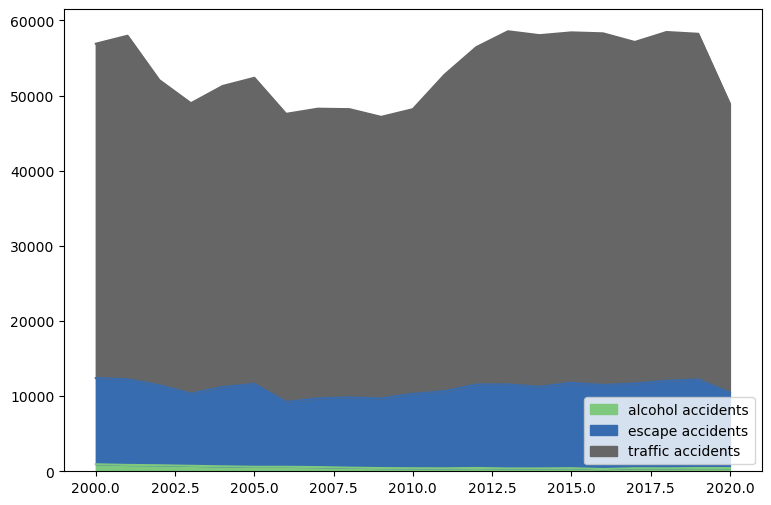

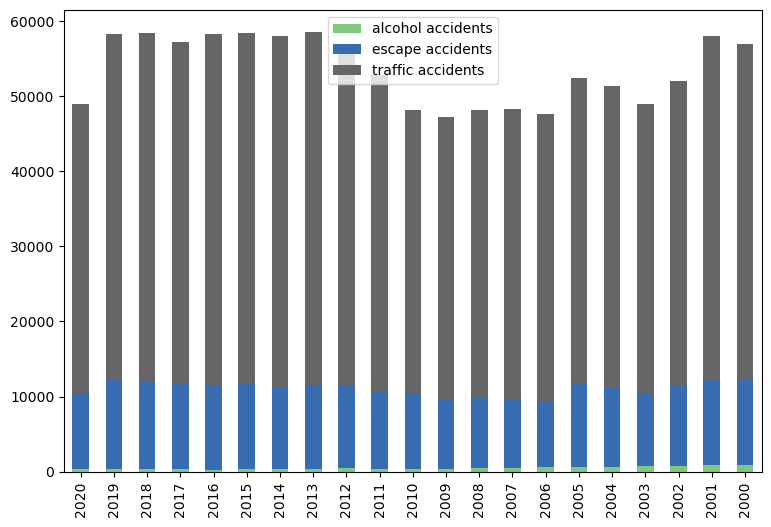

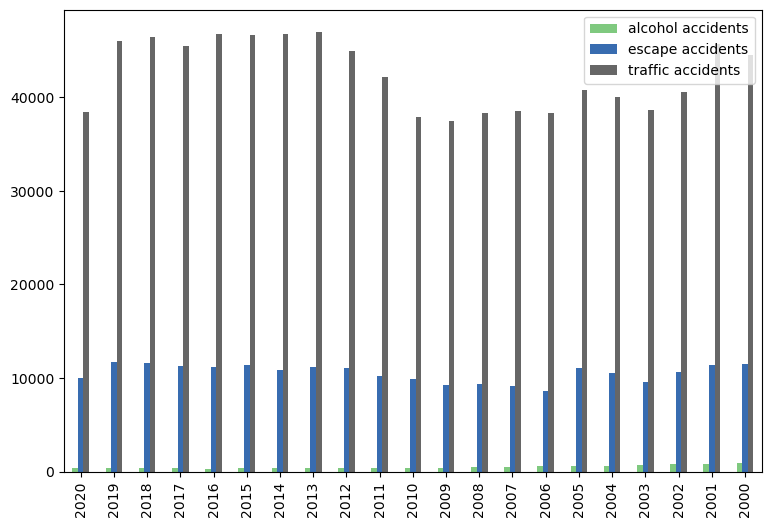

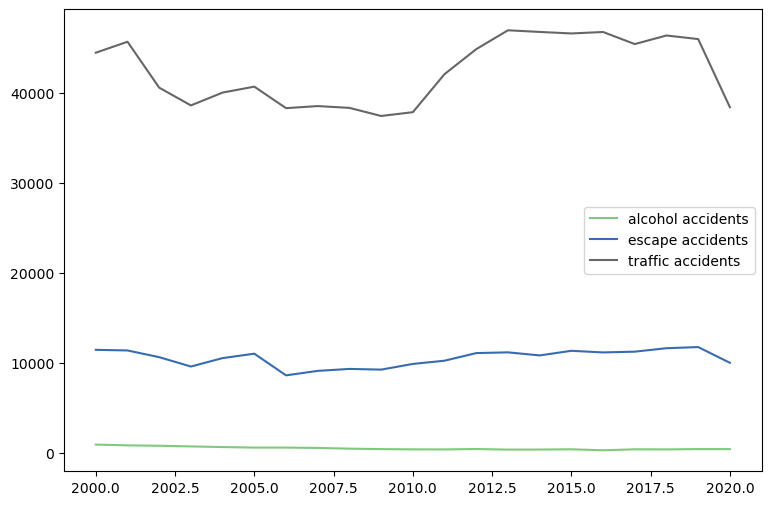

In [37]:
# Data Visualization

'alcohol accidents','escape accidents','traffic accidents'

accidents = data[data['Year'] < 2021]

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'alcohol accidents') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'all in all')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'escape accidents') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'all in all')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'traffic accidents') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'all in all')
    )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        'alcohol accidents': Verkehrsunfälle['Value'].to_numpy(),
        'escape accidents': Fluchtunfälle['Value'].to_numpy(),
        'traffic accidents': Alkoholunfälle['Value'].to_numpy()
    },
    index= years
)

accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent', stacked= True)
plt.gcf().set_size_inches(9,6)
accidents_category.plot(kind='bar', colormap='Accent')
plt.gcf().set_size_inches(9,6)
accidents_category.plot(colormap='Accent')
plt.gcf().set_size_inches(9,6)

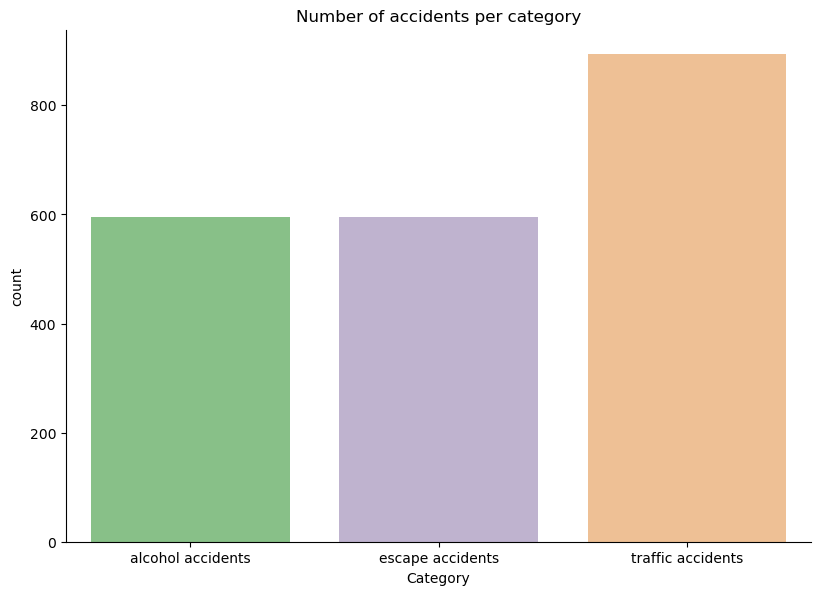

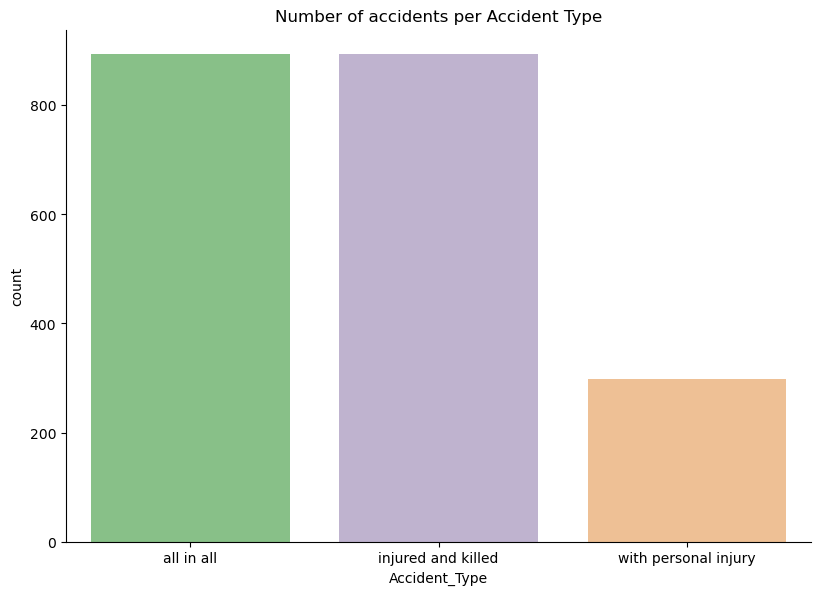

In [42]:
# Plot Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)

# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)